Weather Forcasting Project

In [339]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Reading the dataset

In [340]:
df=pd.read_csv("weatherAUS.csv")
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [341]:
# diamension of data
df.shape

(145460, 23)

In [342]:
# checking basic info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [343]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

Checking missing values in dataset

In [344]:
df.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

checking duplicates

In [345]:
df.duplicated().sum()

0

Exploratory Data Analysis

In [346]:
# Seperate cat and con in dataset
cat=list(df.columns[df.dtypes=="object"])
cat

['Date',
 'Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [347]:
con=list(df.columns[df.dtypes!="object"])
con

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

Desciptive Analysis

In [348]:
# categorical data
df[cat].describe().T

,count,unique,top,freq
Date,145460,3436,2013-11-12,49
Location,145460,49,Canberra,3436
WindGustDir,135134,16,W,9915
WindDir9am,134894,16,N,11758
WindDir3pm,141232,16,SE,10838
RainToday,142199,2,No,110319
RainTomorrow,142193,2,No,110316


In [349]:
# continous dat
df[con].describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,143975.0,12.194034,6.398495,-8.5,7.6,12.0,16.9,33.9
MaxTemp,144199.0,23.221348,7.119049,-4.8,17.9,22.6,28.2,48.1
Rainfall,142199.0,2.360918,8.478060,0.0,0.0,0.0,0.8,371.0
Evaporation,82670.0,5.468232,4.193704,0.0,2.6,4.8,7.4,145.0
Sunshine,75625.0,7.611178,3.785483,0.0,4.8,8.4,10.6,14.5
WindGustSpeed,135197.0,40.035230,13.607062,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,143693.0,14.043426,8.915375,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,142398.0,18.662657,8.809800,0.0,13.0,19.0,24.0,87.0
Humidity9am,142806.0,68.880831,19.029164,0.0,57.0,70.0,83.0,100.0
Humidity3pm,140953.0,51.539116,20.795902,0.0,37.0,52.0,66.0,100.0


In [350]:
print("missing values in categorical data")
df[cat].isna().sum()

missing values in categorical data


Date                0
Location            0
WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64

In [351]:
print("missing values in continuos data")
df[con].isna().sum()

missing values in continuos data


MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustSpeed    10263
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
dtype: int64

In [352]:
print("count of unique values in categorical data")
df[cat].nunique()

count of unique values in categorical data


Date            3436
Location          49
WindGustDir       16
WindDir9am        16
WindDir3pm        16
RainToday          2
RainTomorrow       2
dtype: int64

In [353]:
print("values counts in categorical variable")
for i in cat:
    print(df[i].value_counts())

values counts in categorical variable
Date
2013-11-12    49
2014-09-01    49
2014-08-23    49
2014-08-24    49
2014-08-25    49
              ..
2007-11-29     1
2007-11-28     1
2007-11-27     1
2007-11-26     1
2008-01-31     1
Name: count, Length: 3436, dtype: int64
Location
Canberra            3436
Sydney              3344
Darwin              3193
Melbourne           3193
Brisbane            3193
Adelaide            3193
Perth               3193
Hobart              3193
Albany              3040
MountGambier        3040
Ballarat            3040
Townsville          3040
GoldCoast           3040
Cairns              3040
Launceston          3040
AliceSprings        3040
Bendigo             3040
Albury              3040
MountGinini         3040
Wollongong          3040
Newcastle           3039
Tuggeranong         3039
Penrith             3039
Woomera             3009
Nuriootpa           3009
Cobar               3009
CoffsHarbour        3009
Moree               3009
Sale                3

Feature Engineering

In [354]:
df["Date"]=pd.to_datetime(df['Date'])

In [355]:
df['Year']=df['Date'].dt.year

In [356]:
df['Month']=df['Date'].dt.month

In [357]:
df['Day']=df['Date'].dt.day

In [358]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


In [359]:
# drop date column
df.drop(columns="Date",inplace=True)

Univariate Analysis

In [360]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


In [361]:
cat.remove('Date')

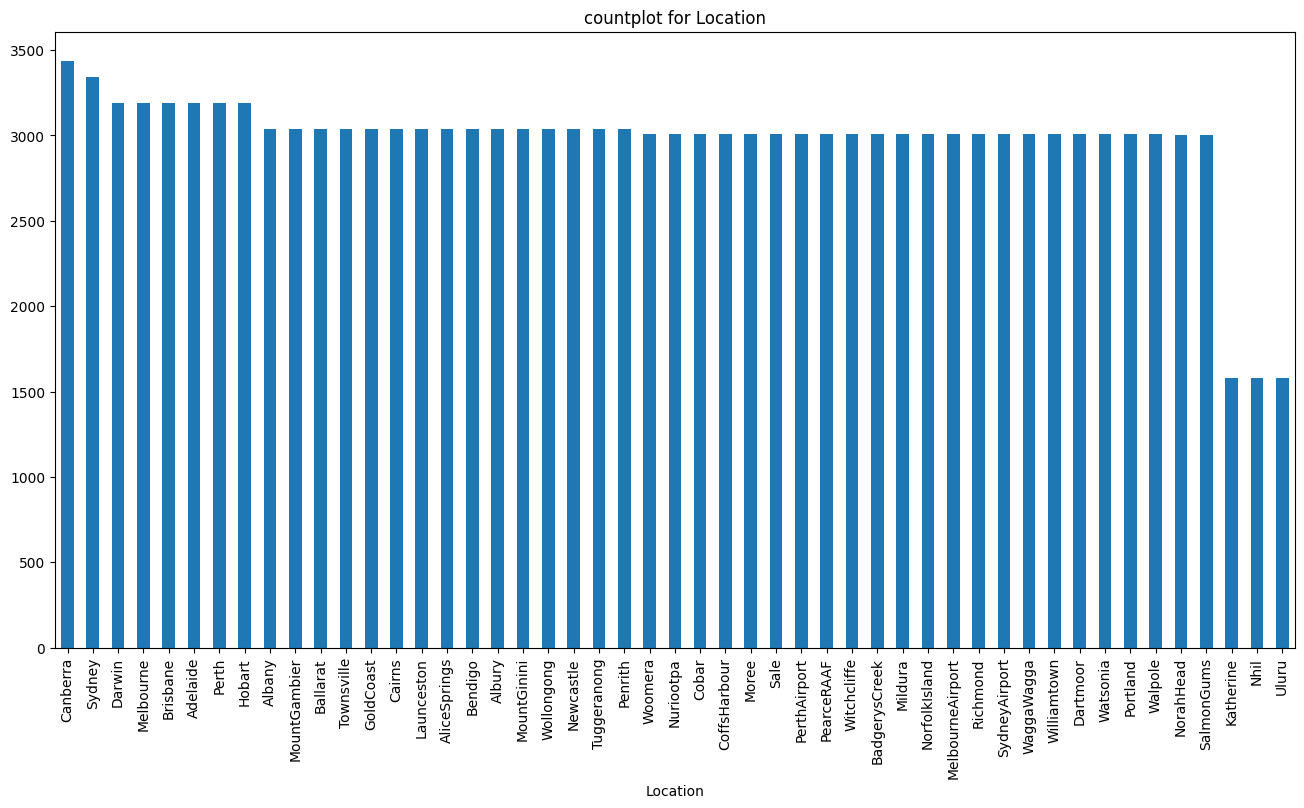

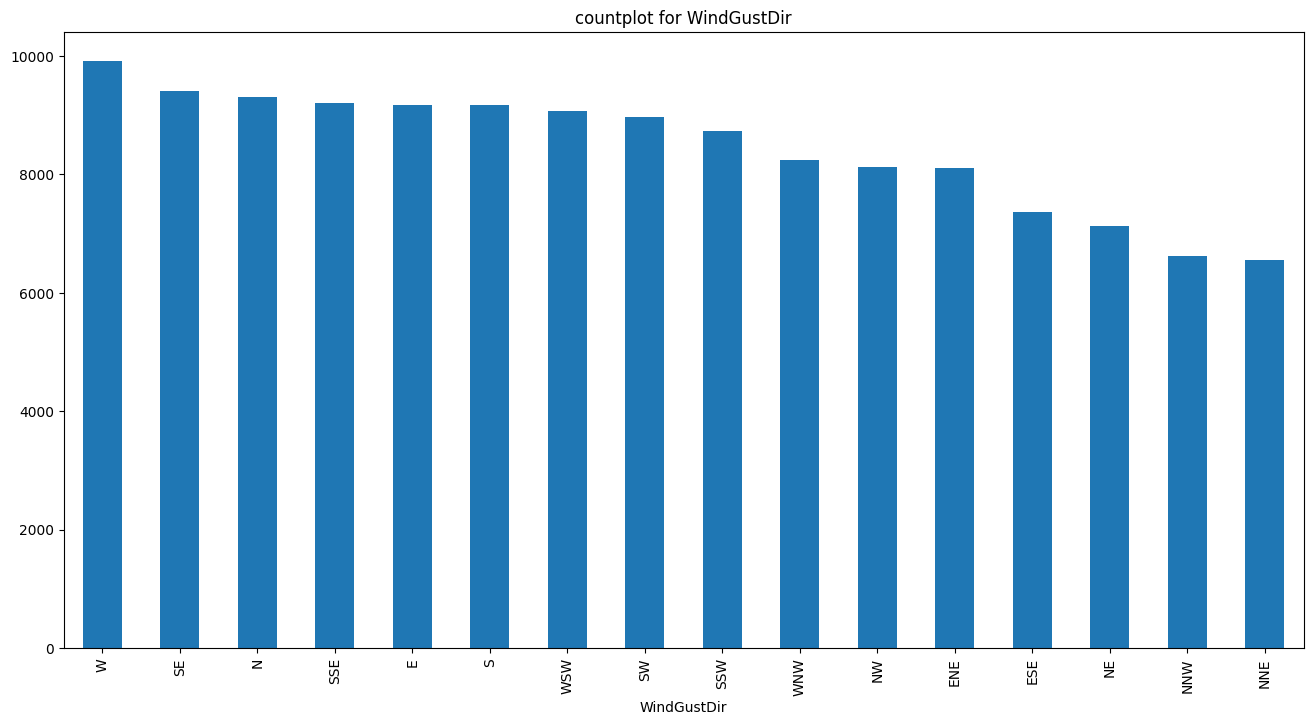

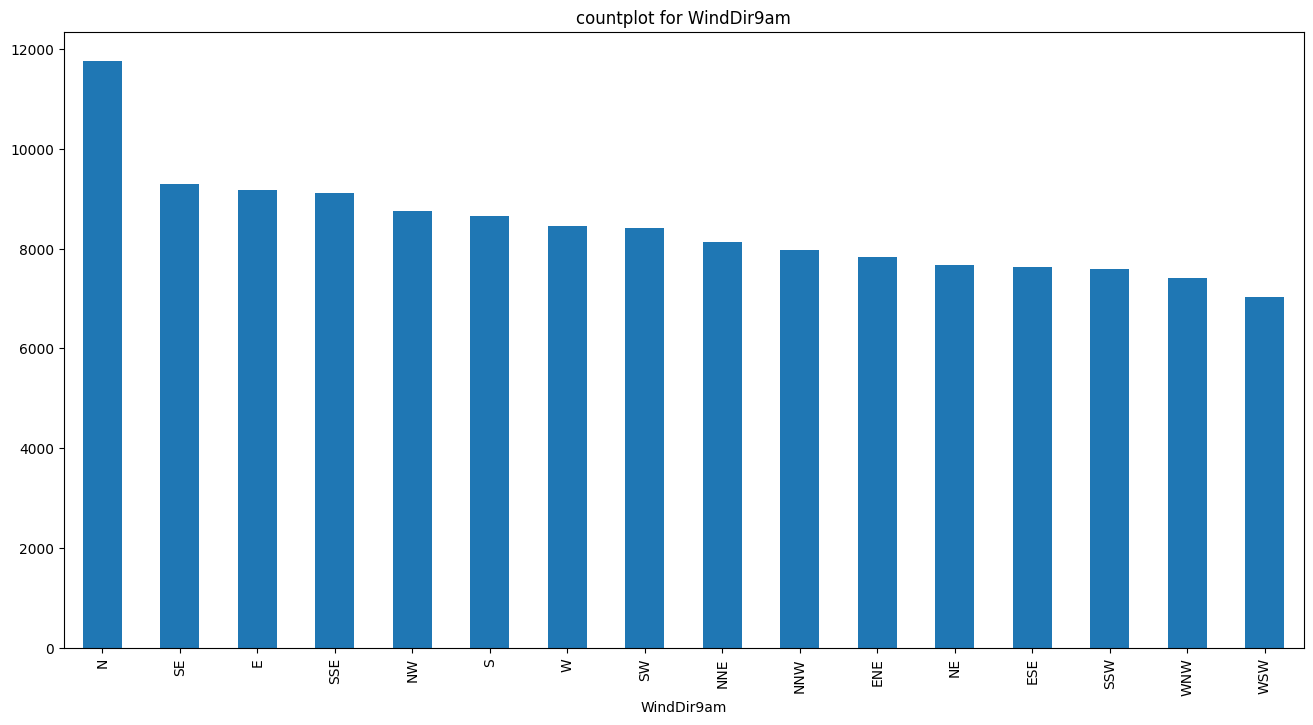

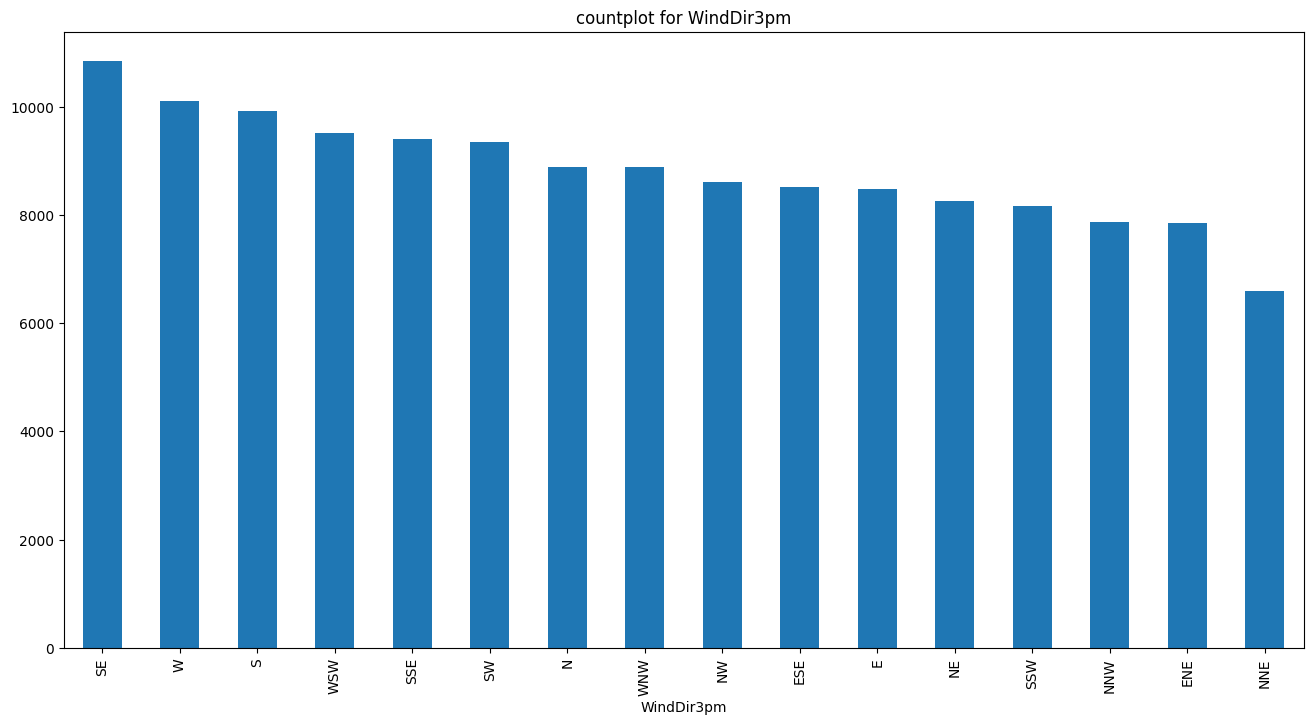

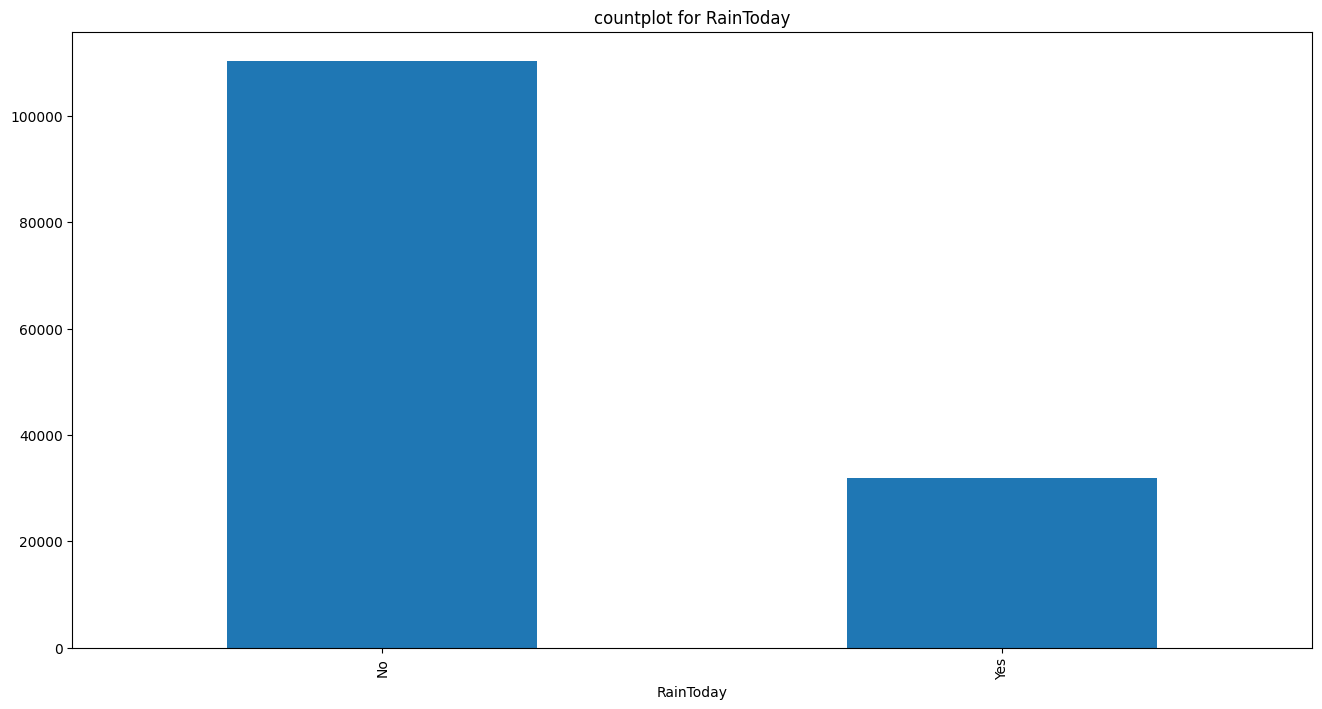

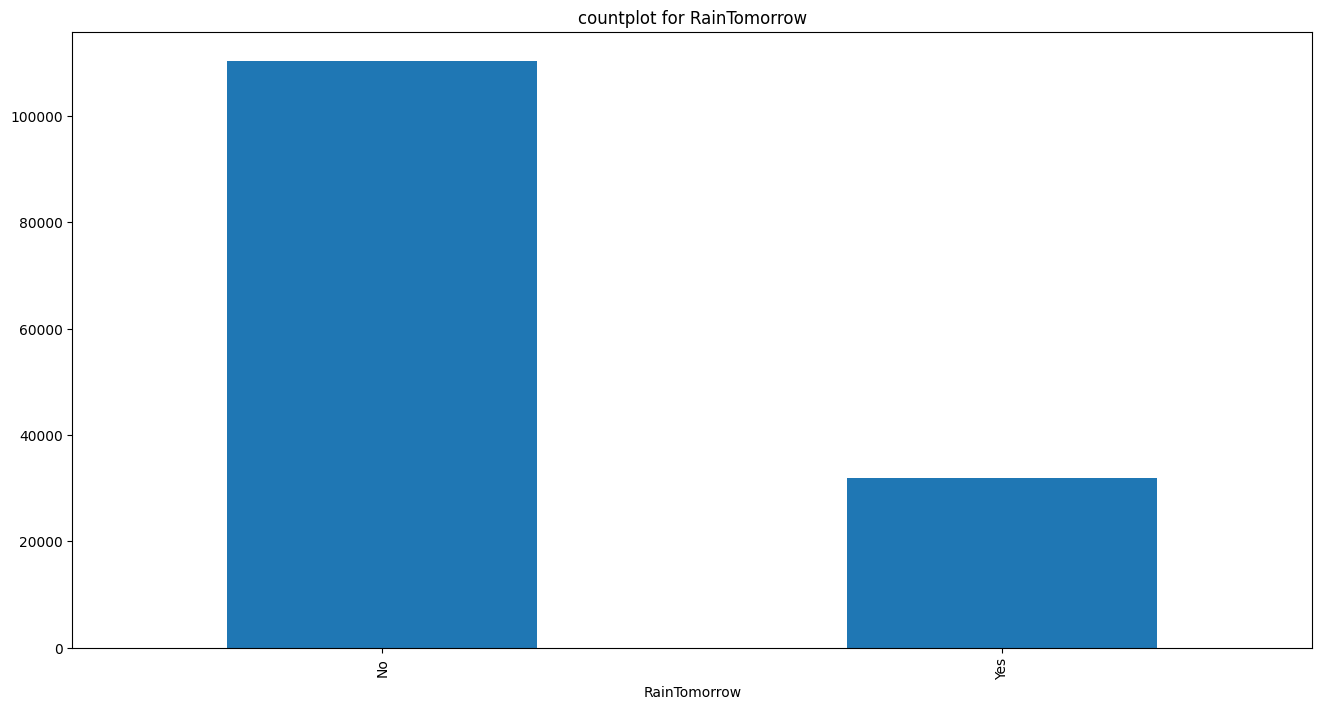

In [362]:
for i in cat:
    plt.figure(figsize=(16,8))
    plt.title(f"countplot for {i}")
    df[i].value_counts().plot(kind="bar")
    plt.show()

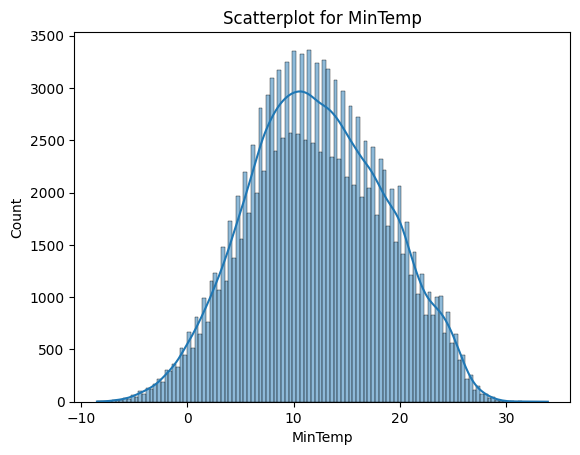

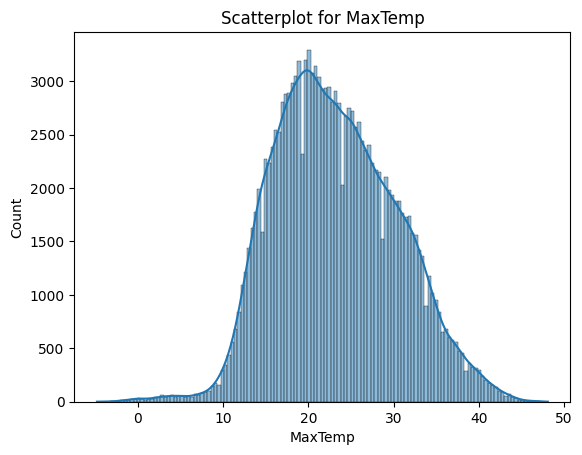

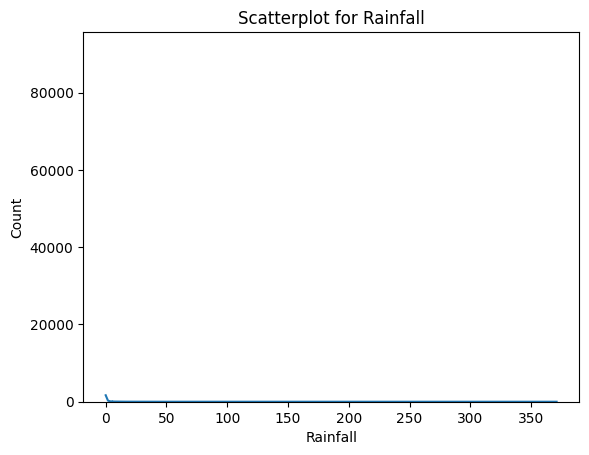

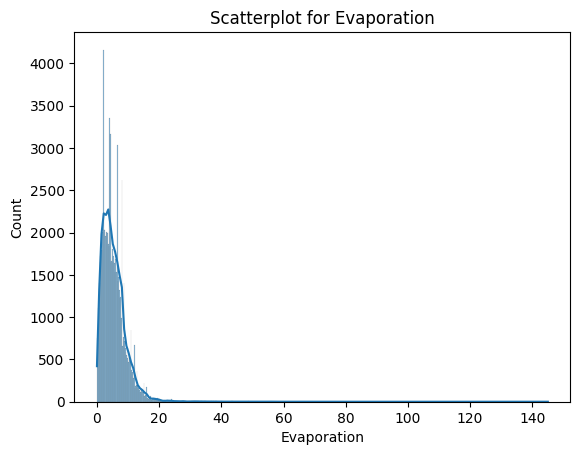

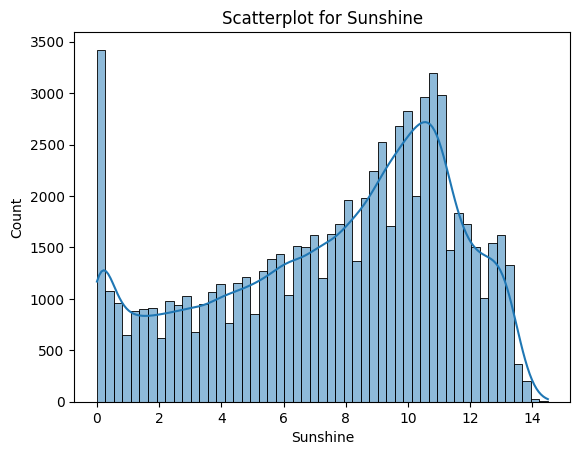

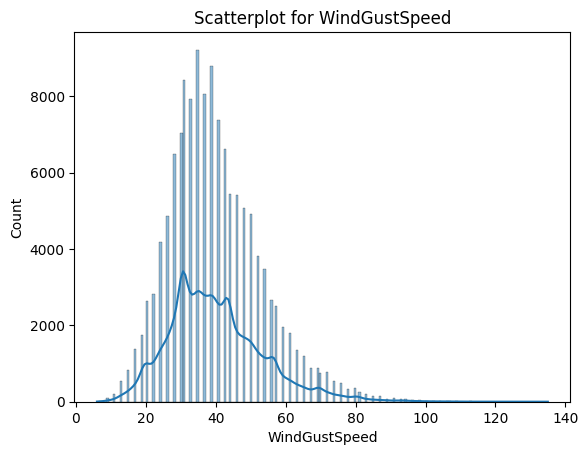

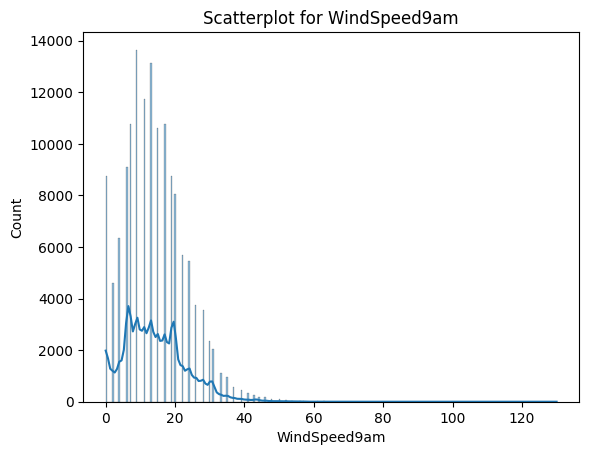

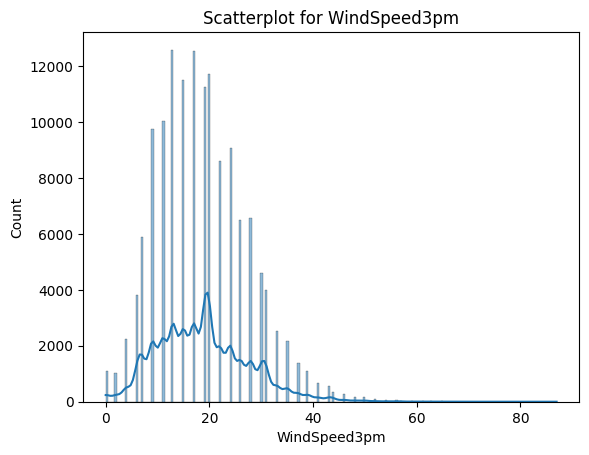

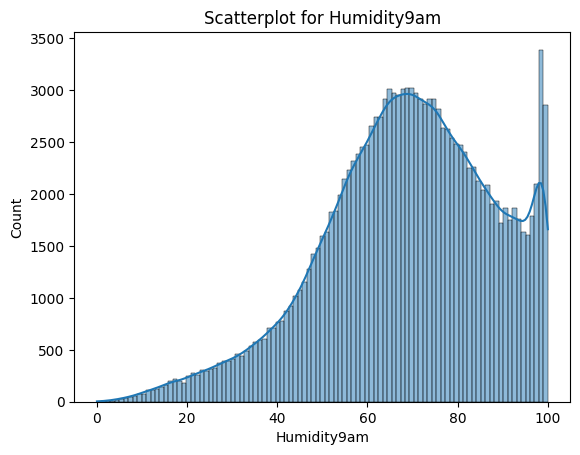

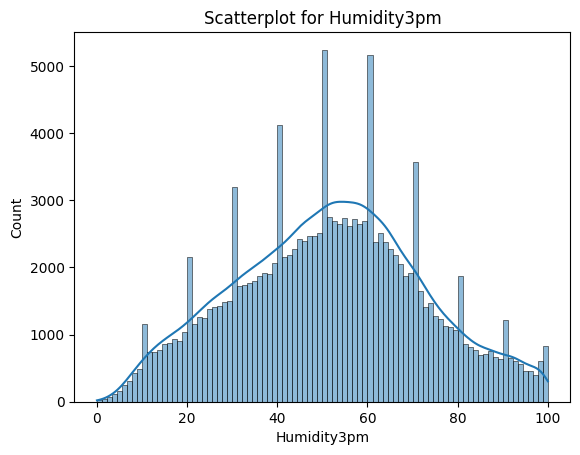

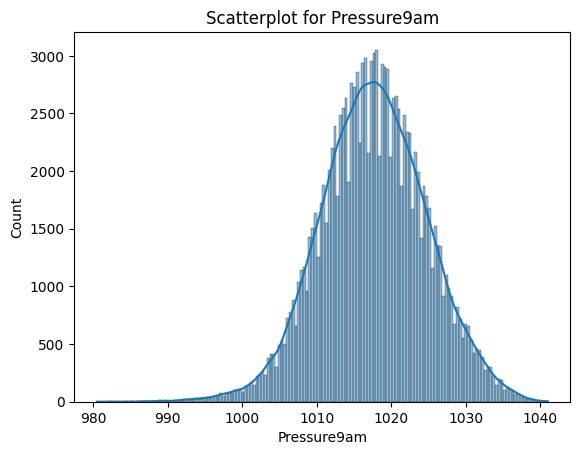

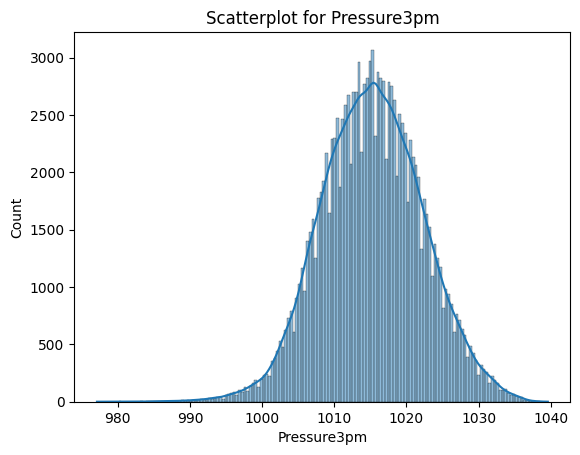

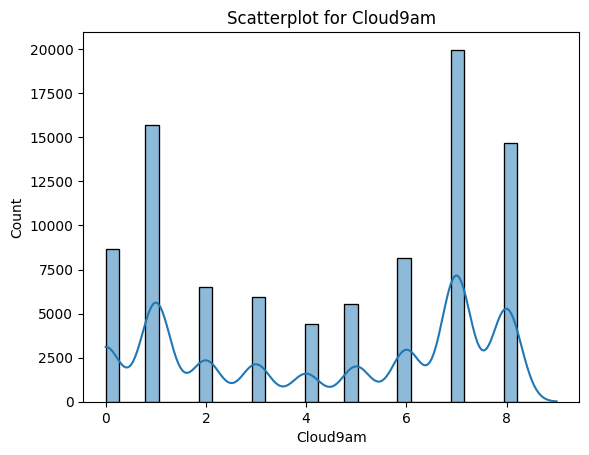

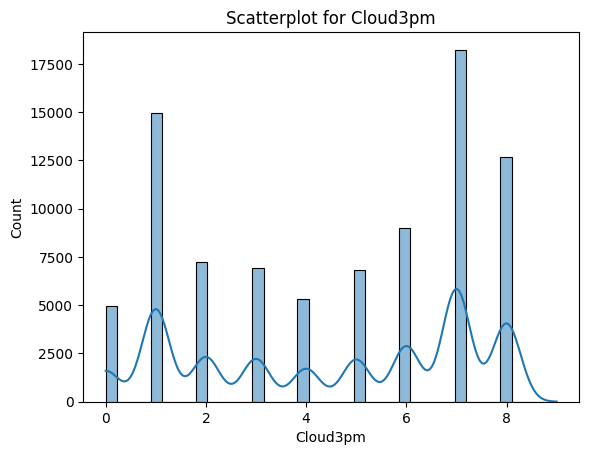

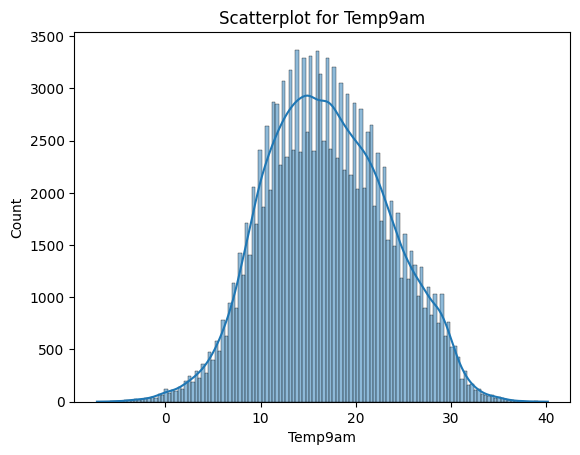

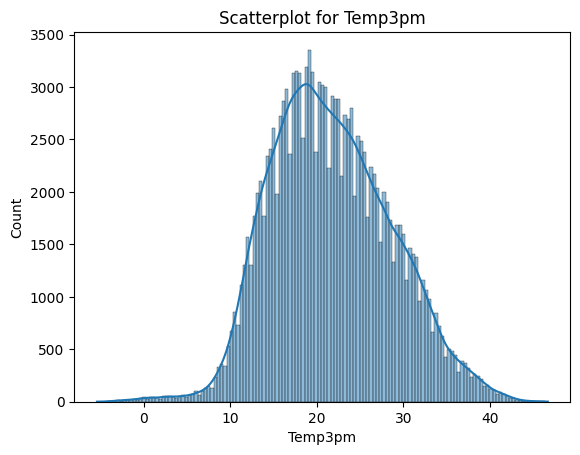

In [363]:
for i in con:
    plt.title(f"Scatterplot for {i}")
    sns.histplot(df,x=df[i],kde=True)
    plt.show()

Bivariate Analysis

In [364]:
cat

['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [365]:
con

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

<Axes: title={'center': 'Minimum Temperature vs Rainfall'}, xlabel='MinTemp', ylabel='Rainfall'>

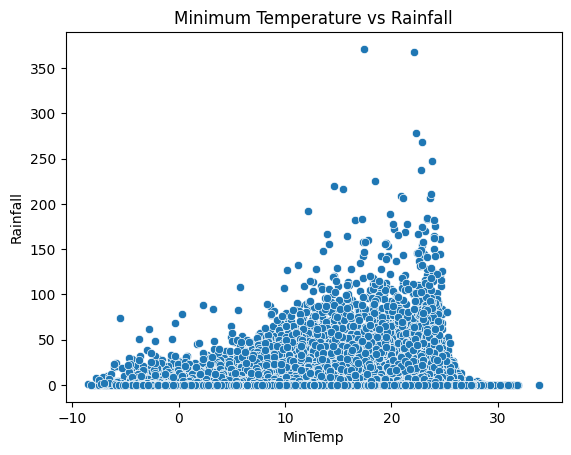

In [366]:
plt.title("Minimum Temperature vs Rainfall")
sns.scatterplot(df,x="MinTemp",y="Rainfall")

<Axes: title={'center': 'WindSpeed9am vs Rainfall'}, xlabel='WindSpeed9am', ylabel='Rainfall'>

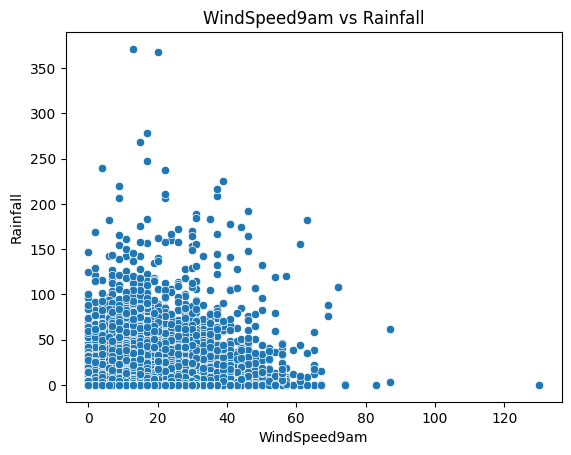

In [367]:
plt.title("WindSpeed9am vs Rainfall")
sns.scatterplot(df,x="WindSpeed9am",y="Rainfall")

<Axes: title={'center': 'Humidity9am vs Rainfall'}, xlabel='Humidity9am', ylabel='Rainfall'>

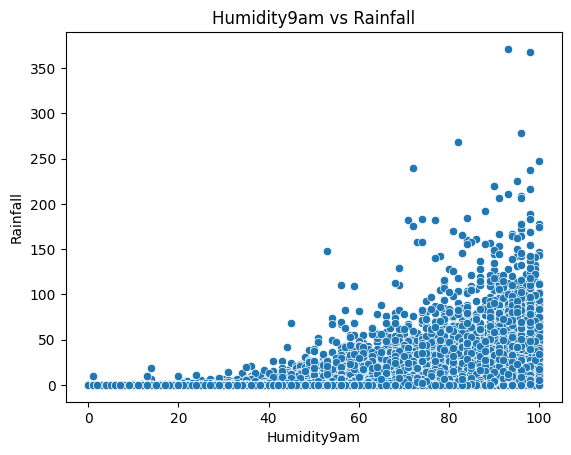

In [368]:
plt.title("Humidity9am vs Rainfall")
sns.scatterplot(df,x="Humidity9am",y="Rainfall")

<Axes: title={'center': 'Pressure9am vs Rainfall'}, xlabel='Pressure9am', ylabel='Rainfall'>

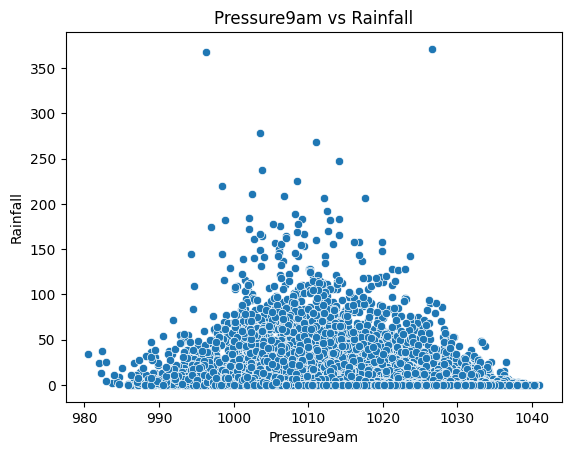

In [369]:
plt.title("Pressure9am vs Rainfall")
sns.scatterplot(df,x="Pressure9am",y="Rainfall")

<Axes: title={'center': 'Cloud9am vs Rainfall'}, xlabel='Cloud9am', ylabel='Rainfall'>

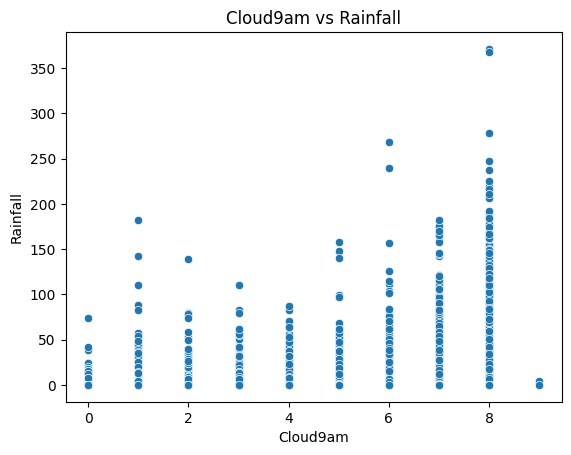

In [370]:
plt.title("Cloud9am vs Rainfall")
sns.scatterplot(df,x="Cloud9am",y="Rainfall")

In [371]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


<Axes: xlabel='RainToday', ylabel='Rainfall'>

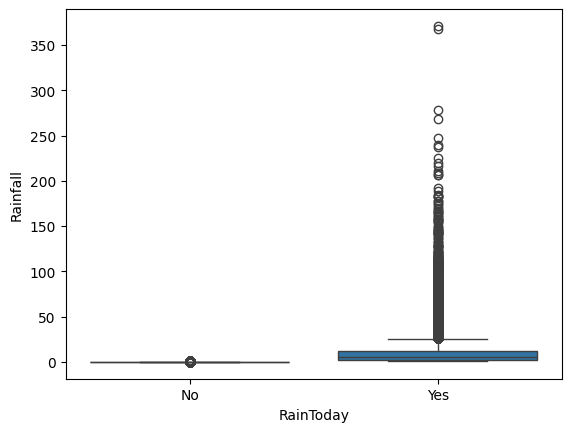

In [372]:
sns.boxplot(data=df,x="RainToday",y="Rainfall")

<Axes: >

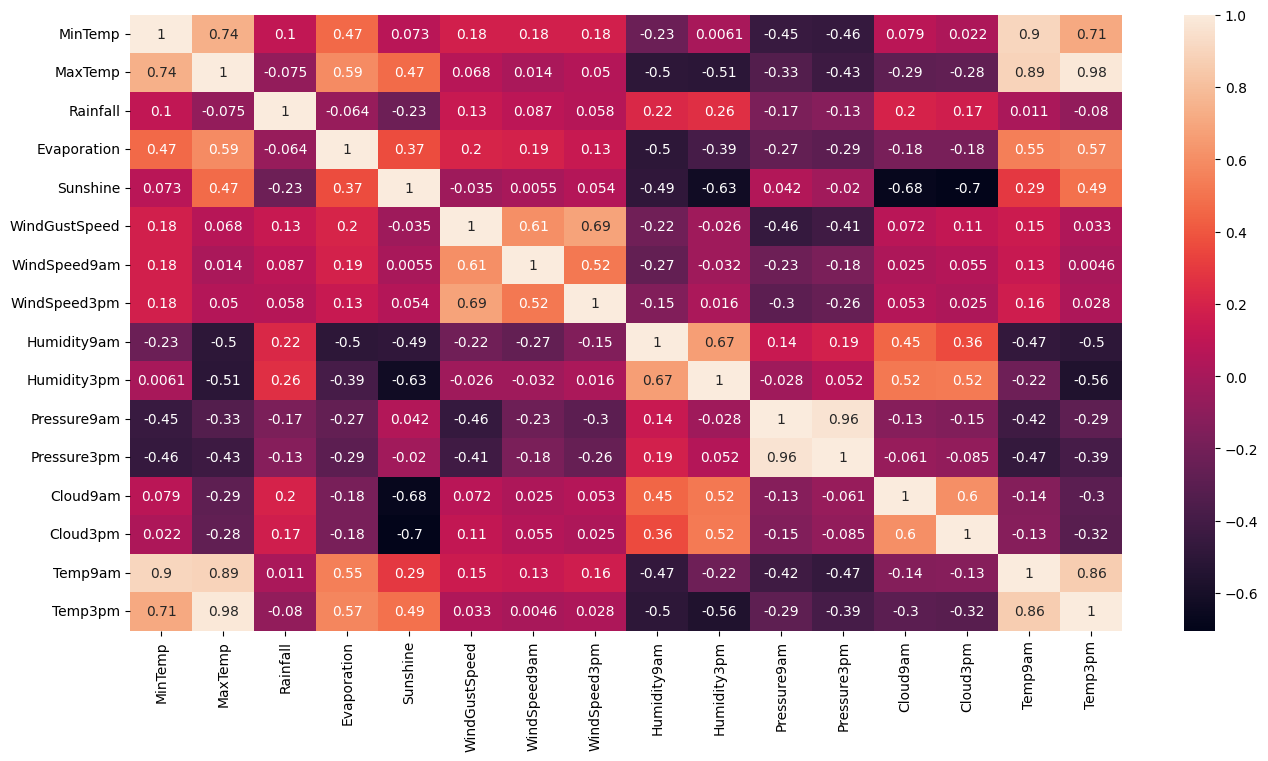

In [373]:
plt.figure(figsize=(16,8))
sns.heatmap(df[con].corr(),annot=True)

In [374]:
cat

['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

<Axes: xlabel='RainToday', ylabel='RainTomorrow'>

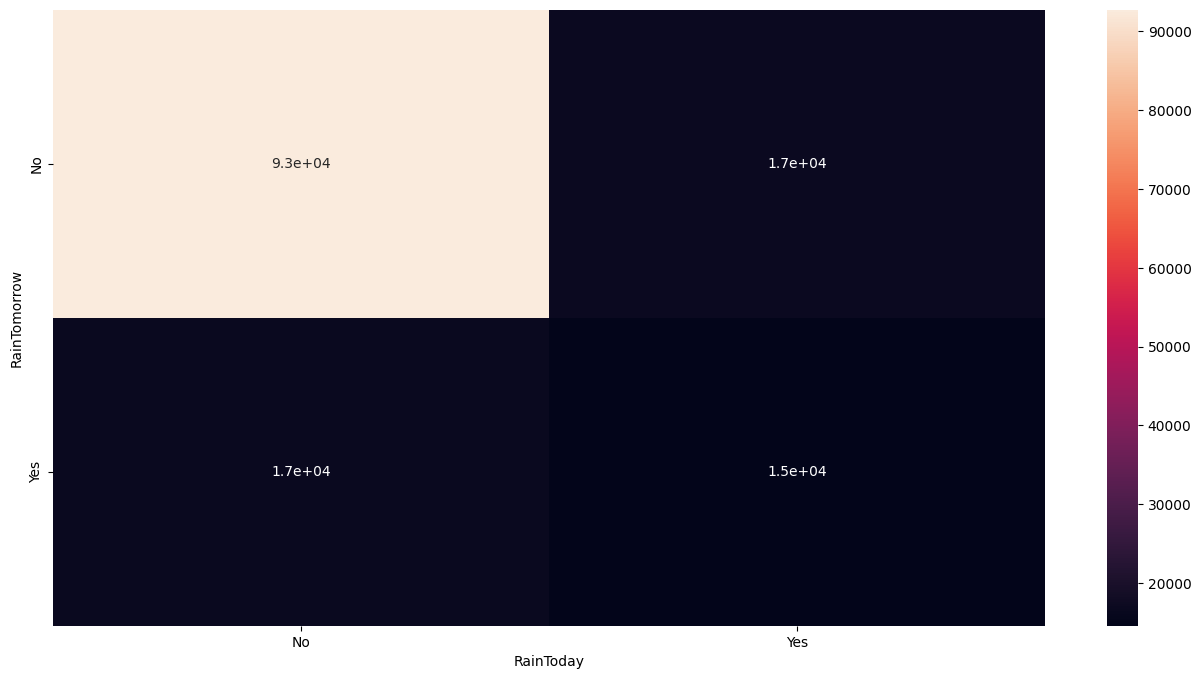

In [375]:
cr1=pd.crosstab(df["RainTomorrow"],df["RainToday"])
plt.figure(figsize=(16,8))
sns.heatmap(cr1,annot=True)

seperate x and y 

In [376]:
x=df.drop(columns="RainTomorrow")
x.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.7,1007.1,8.0,NaN,16.9,21.8,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1010.6,1007.8,NaN,NaN,17.2,24.3,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1007.6,1008.7,NaN,2.0,21.0,23.2,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1017.6,1012.8,NaN,NaN,18.1,26.5,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1010.8,1006.0,7.0,8.0,17.8,29.7,No,2008,12,5


In [377]:
df["RainTomorrow"]=df["RainTomorrow"].fillna("No")

In [378]:
df["RainTomorrow"].isna().sum()

0

In [379]:
y=df[["RainTomorrow"]]
y.head()

,RainTomorrow
0,No
1,No
2,No
3,No
4,No


Creating aPreprocessing Pipeline

In [380]:
# seperate cat and con in x
cat=list(x.columns[x.dtypes=="object"])
cat

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [381]:
con=list(x.columns[x.dtypes!="object"])
con

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'Year',
 'Month',
 'Day']

In [382]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [383]:
num_pipe1=Pipeline(steps=[('impute',SimpleImputer(strategy="mean")),
                          ('scaler',StandardScaler())])
cat_pipe1=Pipeline(steps=[('impute',SimpleImputer(strategy="most_frequent")),
                             ("ohe",OneHotEncoder(handle_unknown="ignore"))])
pre1=ColumnTransformer([('num',num_pipe1,con),
                        ('cat',cat_pipe1,cat)])

In [384]:
x_pre1=pre1.fit_transform(x)

In [385]:
x_pre1=x_pre1.toarray()

In [386]:
cols=pre1.get_feature_names_out()
cols

array(['num__MinTemp', 'num__MaxTemp', 'num__Rainfall',
       'num__Evaporation', 'num__Sunshine', 'num__WindGustSpeed',
       'num__WindSpeed9am', 'num__WindSpeed3pm', 'num__Humidity9am',
       'num__Humidity3pm', 'num__Pressure9am', 'num__Pressure3pm',
       'num__Cloud9am', 'num__Cloud3pm', 'num__Temp9am', 'num__Temp3pm',
       'num__Year', 'num__Month', 'num__Day', 'cat__Location_Adelaide',
       'cat__Location_Albany', 'cat__Location_Albury',
       'cat__Location_AliceSprings', 'cat__Location_BadgerysCreek',
       'cat__Location_Ballarat', 'cat__Location_Bendigo',
       'cat__Location_Brisbane', 'cat__Location_Cairns',
       'cat__Location_Canberra', 'cat__Location_Cobar',
       'cat__Location_CoffsHarbour', 'cat__Location_Dartmoor',
       'cat__Location_Darwin', 'cat__Location_GoldCoast',
       'cat__Location_Hobart', 'cat__Location_Katherine',
       'cat__Location_Launceston', 'cat__Location_Melbourne',
       'cat__Location_MelbourneAirport', 'cat__Location_Mildur

In [387]:
x_pre1=pd.DataFrame(x_pre1,columns=cols)
x_pre1.head()

,num__MinTemp,num__MaxTemp,num__Rainfall,num__Evaporation,num__Sunshine,num__WindGustSpeed,num__WindSpeed9am,num__WindSpeed3pm,num__Humidity9am,num__Humidity3pm,...,cat__WindDir3pm_S,cat__WindDir3pm_SE,cat__WindDir3pm_SSE,cat__WindDir3pm_SSW,cat__WindDir3pm_SW,cat__WindDir3pm_W,cat__WindDir3pm_WNW,cat__WindDir3pm_WSW,cat__RainToday_No,cat__RainToday_Yes
0,0.189447,-0.045336,-0.210072,-2.809331e-16,-6.508050e-16,0.302234,0.672222,0.612323,0.112395,-1.442965,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,-0.753101,0.265043,-0.281650,-2.809331e-16,-6.508050e-16,0.302234,-1.133438,0.382874,-1.319609,-1.296417,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.110901,0.349692,-0.281650,-2.809331e-16,-6.508050e-16,0.454694,0.559368,0.841771,-1.637832,-1.052171,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,-0.470337,0.674180,-0.281650,-2.809331e-16,-6.508050e-16,-1.222364,-0.343462,-1.108541,-1.266572,-1.736061,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.833521,1.280830,-0.162353,-2.809331e-16,-6.508050e-16,0.073544,-0.794877,0.153426,0.695804,-0.905623,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [388]:
x_pre1.isna().sum()

num__MinTemp           0
num__MaxTemp           0
num__Rainfall          0
num__Evaporation       0
num__Sunshine          0
                      ..
cat__WindDir3pm_W      0
cat__WindDir3pm_WNW    0
cat__WindDir3pm_WSW    0
cat__RainToday_No      0
cat__RainToday_Yes     0
Length: 118, dtype: int64

Splitting the dataset

In [389]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_pre1,y)

In [390]:
x_train.isna().sum()

num__MinTemp           0
num__MaxTemp           0
num__Rainfall          0
num__Evaporation       0
num__Sunshine          0
                      ..
cat__WindDir3pm_W      0
cat__WindDir3pm_WNW    0
cat__WindDir3pm_WSW    0
cat__RainToday_No      0
cat__RainToday_Yes     0
Length: 118, dtype: int64

In [391]:
y_train.shape

(109095, 1)

In [392]:
x_test.isna().sum(0)

num__MinTemp           0
num__MaxTemp           0
num__Rainfall          0
num__Evaporation       0
num__Sunshine          0
                      ..
cat__WindDir3pm_W      0
cat__WindDir3pm_WNW    0
cat__WindDir3pm_WSW    0
cat__RainToday_No      0
cat__RainToday_Yes     0
Length: 118, dtype: int64

In [393]:
y_test.shape

(36365, 1)

Creating a Logistic Regression Model

In [394]:
from sklearn.linear_model import LogisticRegression


In [395]:
model=LogisticRegression(solver='liblinear')


Model training

In [396]:
model.fit(x_train,y_train)

e:\etl_project\repository\venv\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(solver='liblinear')

In [397]:
model.score(x_train,y_train)

0.8483248544846235

In [398]:
model.score(x_test,y_test)

0.848563178880792

model testing

In [399]:
y_pred=model.predict(x_test)
y_pred[:5]

array(['No', 'No', 'No', 'No', 'No'], dtype=object)

In [400]:
# probabilities of the classes
y_pred_prob=model.predict_proba(x_test)
y_pred_prob

array([[0.72506444, 0.27493556],
       [0.92480536, 0.07519464],
       [0.99133785, 0.00866215],
       ...,
       [0.08502106, 0.91497894],
       [0.86367209, 0.13632791],
       [0.90354704, 0.09645296]])

Plotting Confusion Matrix

In [401]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay


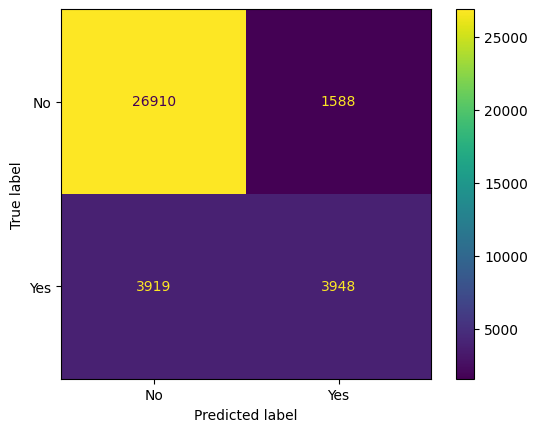

In [402]:
cm=confusion_matrix(y_test,y_pred)
cfd=ConfusionMatrixDisplay(cm,display_labels=model.classes_)
cfd.plot()

plotting classification report

In [403]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          No       0.87      0.94      0.91     28498
         Yes       0.71      0.50      0.59      7867

    accuracy                           0.85     36365
   macro avg       0.79      0.72      0.75     36365
weighted avg       0.84      0.85      0.84     36365

